In [1]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud
import re
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    return df

In [3]:
df=wrangle("/Users/bambino/Documents/DATASETS/netflix_titles.csv")


In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
df.show_id.value_counts()[:5]#drop show_id,

s7449    1
s6414    1
s4463    1
s1869    1
s3517    1
Name: show_id, dtype: int64

In [6]:
df=df.drop('show_id',axis=1)

In [7]:
df.shape

(8807, 11)

In [8]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#percentage of missing data
df.isnull().mean()*100

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
df[df.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [11]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

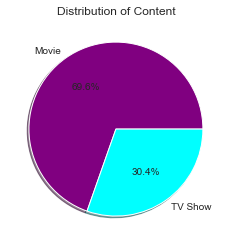

In [59]:
plt.pie(df['type'].value_counts(),labels=['Movie','TV Show'],autopct='%1.1f%%',colors=['purple','cyan'],shadow=True)
plt.title('Distribution of Content');

     release_year     type  Total count
97           2011    Movie          145
98           2011  TV Show           40
99           2012    Movie          173
100          2012  TV Show           64
101          2013    Movie          225


Text(0.5, 1.0, 'Rate of content release from 2010')

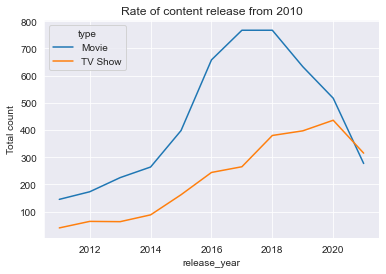

In [13]:
df1=df[['type','release_year']]
df1=df1.groupby(['release_year','type']).size()
df2=df1.reset_index(name='Total count')
df2=df2[df2['release_year']>2010]
print(df2.head())

sns.lineplot(x=df2['release_year'],y=df2['Total count'],hue=df2['type'])
plt.title('Rate of content release from 2010')

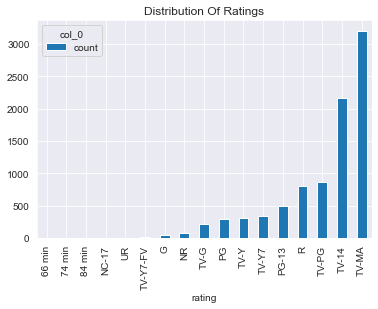

In [14]:
pd.crosstab(df['rating'],'count').sort_values(by='count').plot(kind='bar')
plt.title('Distribution Of Ratings');

ANALYSIS OF MOVIES

In [15]:
movie=df[df['type']=='Movie']

In [16]:
movie[:2]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [17]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6131 non-null   object
 1   title         6131 non-null   object
 2   director      5943 non-null   object
 3   cast          5656 non-null   object
 4   country       5691 non-null   object
 5   date_added    6131 non-null   object
 6   release_year  6131 non-null   int64 
 7   rating        6129 non-null   object
 8   duration      6128 non-null   object
 9   listed_in     6131 non-null   object
 10  description   6131 non-null   object
dtypes: int64(1), object(10)
memory usage: 574.8+ KB


In [18]:
movie[movie.title.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


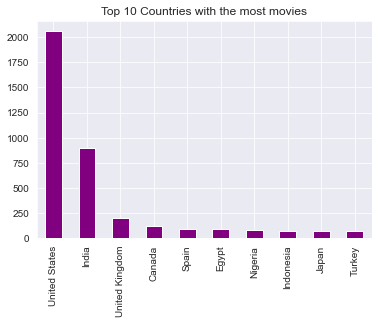

In [19]:
movie.country.value_counts().head(10).plot(kind='bar',color='purple')
plt.title('Top 10 Countries with the most movies');

In [20]:
c=movie.director.value_counts()[:15]#.plot(kind='bar')

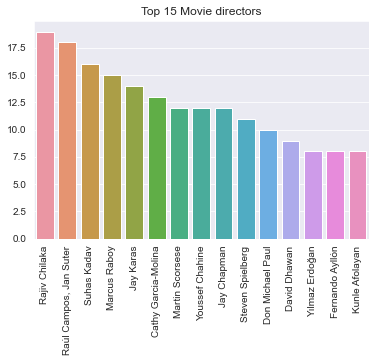

In [21]:
sns.barplot(c.index,c.values)
plt.xticks(rotation=90)
plt.title('Top 15 Movie directors');

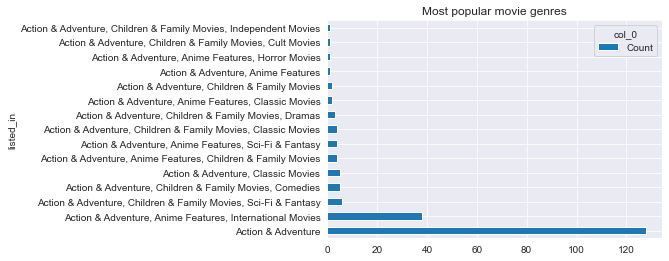

In [22]:
pd.crosstab(movie['listed_in'],'Count')[:15].sort_values(by='Count',ascending=False).plot(kind='barh')
plt.title('Most popular movie genres');

ANALYSIS OF TV SHOWS

In [23]:
tv_show=df[df['type']=='TV Show']

In [24]:
tv_show[:2]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


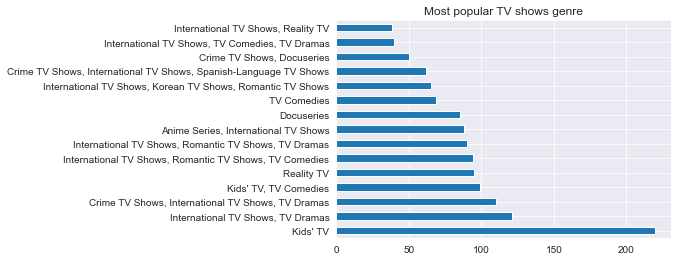

In [25]:
tv_show['listed_in'].value_counts()[:15].plot(kind='barh')
plt.title('Most popular TV shows genre');

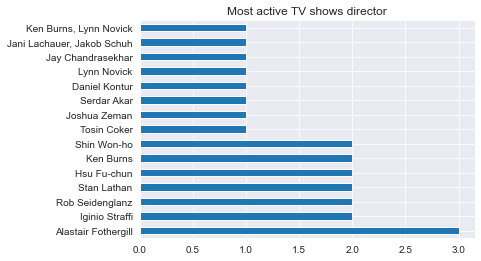

In [26]:
tv_show['director'].value_counts()[:15].plot(kind='barh')
plt.title('Most active TV shows director');

SENTIMENT ANALYSIS

In [27]:
from textblob import TextBlob

In [51]:
df_sent=df[['release_year','description']]

In [52]:
for index,row in df_sent.iterrows():
    z=row['description']
    test=TextBlob(z)
    p=test.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    df_sent.loc[[index,2],'Sentiment']=sent

In [53]:
df_sent.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [56]:
df_sent=df_sent[df_sent['release_year']>2010]

Text(0.5, 1.0, 'Sentiment of content after year 2010')

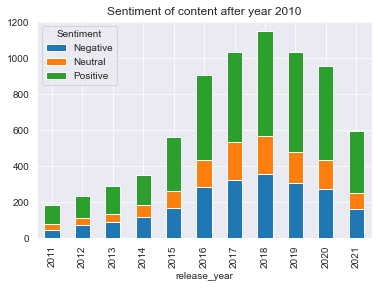

In [58]:
pd.crosstab(df_sent['release_year'],df_sent['Sentiment']).plot(kind='bar',stacked=True)
plt.title('Sentiment of content after year 2010')